# Handling missing values and correlation
## Importing necessary librares

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns

## Importing Data

In [236]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Shape of DataFrame

In [237]:
df.shape

(13320, 9)

## Checking null values

In [238]:
df.isnull()  #Returns True where data is null else returns False

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


## Column wise null values

In [239]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Fillng null values with given number

In [240]:
df2=df.fillna(0) #replacing null by 0
df2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,0,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [241]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Filling null value with previous value by row  (forwardfill)

In [242]:
df3=df.ffill()
df3

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,ArsiaEx,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Filling null value with next value by row (backwardfill)

In [243]:
df4=df.bfill()
df4

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Soiewre,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,DuenaTa,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Mahla T,3600,5.0,1.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Filling null value with previous value by column  (forwardfill)

In [244]:
df5=df.ffill(axis=1)
df5

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,3 BHK,1440,2.0,3.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2 BHK,1200,2.0,1.0,51.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,4 BHK,3600,5.0,5.0,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0


## Filling different null values for different columns

In [245]:
df6=df.fillna({"society":"abcd","balcony":0})
df6

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,abcd,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,abcd,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,abcd,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Filling null value with mean of column

In [246]:
df7=df.fillna(value=df["balcony"].mean()) #we can also use min(), max() for filling minimun and maxmimum values
df7

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1.584376,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1.584376,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,1.584376,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.000000,488.00


## Dropping null values dropna()

In [247]:
df.shape

(13320, 9)

In [248]:
df8=df.dropna()
df8

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [249]:
df8.shape

(7496, 9)

## Drop na with conditions (exporing arg parameters)

In [250]:
df9=df.dropna(how="any",axis=0)  ## how=any it will drop row if atlease 1 null in row, how="all" will drop row if all values are null
df9                              ## axis=0 for rows and axis = 1 for columns

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


## Replace null values

In [251]:
df10=df.replace(np.nan,value="replaced")
df10

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,replaced,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,replaced,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,replaced,3600,5.0,replaced,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Replacing multiple values with multiple values by passing list of values

In [252]:
df11=df.balcony.replace([3,np.nan],value=[3.1,0])
df11

0        1.0
1        3.1
2        3.1
3        1.0
4        1.0
        ... 
13315    0.0
13316    0.0
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

## Interpolation interpolate() function

In [253]:
df12=df["balcony"].interpolate(method="linear")
df12

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    0.5
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

## applying intepolation with different functions and for different columns

In [254]:
df13 = pd.DataFrame([(1.0, np.nan, -1.0, 1.0),(np.nan, 2.0, np.nan, np.nan),(9.0, 3.0, np.nan, 9.0),(16.0, np.nan, -4.0, 16.0)],columns=list('abcd'))
df13

,a,b,c,d
0,1.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,9.0,3.0,NaN,9.0
3,16.0,NaN,-4.0,16.0


## Quadratic interpolation

In [255]:
df13["d"]=df13["d"].interpolate(method="quadratic")
df13

,a,b,c,d
0,1.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,4.0
2,9.0,3.0,NaN,9.0
3,16.0,NaN,-4.0,16.0


## Polynomial interpolation with order 2

In [256]:
df13["a"]=df13["a"].interpolate(method="polynomial",order=2,axis=0)
df13

,a,b,c,d
0,1.0,NaN,-1.0,1.0
1,4.0,2.0,NaN,4.0
2,9.0,3.0,NaN,9.0
3,16.0,NaN,-4.0,16.0


## Linear interpolation

In [257]:
df13["c"]=df13["c"].interpolate(method="linear",axis=0)
df13

,a,b,c,d
0,1.0,NaN,-1.0,1.0
1,4.0,2.0,-2.0,4.0
2,9.0,3.0,-3.0,9.0
3,16.0,NaN,-4.0,16.0


## Linear Extrapolation

In [258]:
df13["b"]=df13["b"].interpolate(method="linear",limit_direction="both",limit_area="outside",axis=0)
df13

,a,b,c,d
0,1.0,2.0,-1.0,1.0
1,4.0,2.0,-2.0,4.0
2,9.0,3.0,-3.0,9.0
3,16.0,3.0,-4.0,16.0


## Formating total_sqft column

In [259]:
def sqft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [260]:
df14=df8.copy()
df14["total_sqft"]=df8["total_sqft"].apply(sqft_to_num)
df14.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Shncyes,1000.0,2.0,1.0,38.00
14,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Skityer,2250.0,3.0,2.0,148.00
15,Super built-up Area,Ready To Move,Mysore Road,2 BHK,PrntaEn,1175.0,2.0,2.0,73.50
16,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,Prityel,1180.0,3.0,2.0,48.00
17,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1540.0,3.0,3.0,60.00


## Correlation

## By default method="pearson"

In [261]:
p_corr=df14.corr(numeric_only=True)
p_corr

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.627872,0.208954,0.673927
bath,0.627872,1.000000,0.275726,0.594844
balcony,0.208954,0.275726,1.000000,0.170138
price,0.673927,0.594844,0.170138,1.000000


## Method = "kendall"

In [262]:
k_corr=df14.corr(method="kendall",numeric_only=True)
k_corr

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.686763,0.299114,0.655144
bath,0.686763,1.000000,0.312317,0.597035
balcony,0.299114,0.312317,1.000000,0.221651
price,0.655144,0.597035,0.221651,1.000000


## method="spearman"

In [263]:
sp_corr=df14.corr(method="spearman",numeric_only=True)
sp_corr

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.810730,0.379464,0.835705
bath,0.810730,1.000000,0.343032,0.718666
balcony,0.379464,0.343032,1.000000,0.283333
price,0.835705,0.718666,0.283333,1.000000


## Heatmap of all correlation matrics generated above

<Axes: >

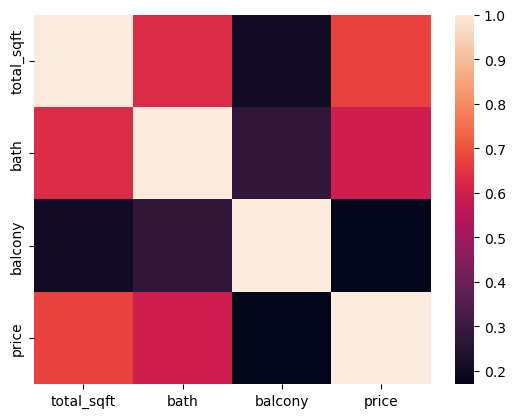

In [264]:
sns.heatmap(p_corr)

<Axes: >

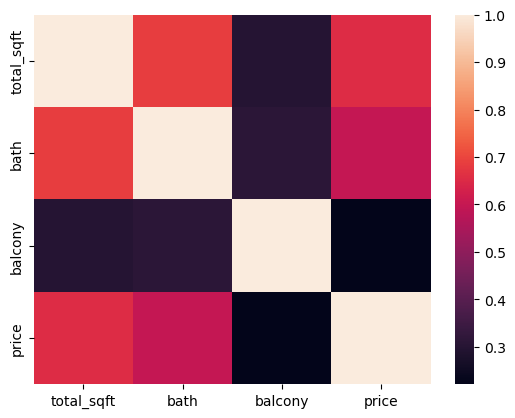

In [265]:
sns.heatmap(k_corr)

<Axes: >

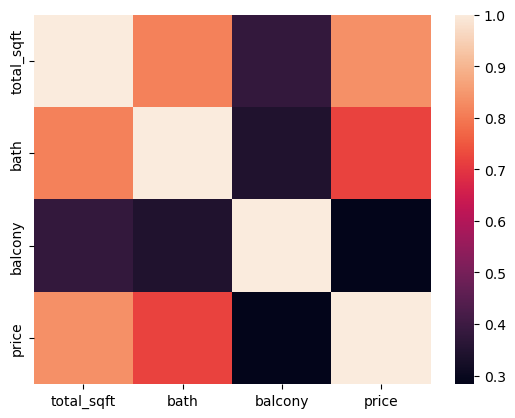

In [266]:
sns.heatmap(sp_corr)